In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pygmo import *

In [11]:
# This class was modeled from the pygmo Documentation. 
# This class is required for me to be able to run the PSO algorithm from 'pygmo'
# The 'best_fit' that you see here is declared inside the 'pso_optimizer' function
class F6:
    def __init__(self, given_bias, given_bounds, given_dimensions):
        
        self.given_bias = given_bias
        self.given_bounds = given_bounds 
        self.given_dimensions = given_dimensions

    def fitness(self, x):
        
        global best_fit
        
        outter_sigma = 0     # Summation functions initialization 
        inner_sigma = 0
        
        for i in range(self.given_dimensions - 1):
            
            z_func = x[i] - f6_shift_values[i]
            outter_sigma += z_func ** 2
            inner_sigma += np.cos(2 * np.pi * z_func)
        total_summation = -20 * np.exp(-0.2 * np.sqrt(outter_sigma / self.given_dimensions)) - np.exp(inner_sigma / self.given_dimensions) + 20 + np.e
        
        ackley_func = total_summation + self.given_bias
        
        best_fit.append(ackley_func)
        return [ackley_func]

    def get_bounds(self):
        return ([self.given_bounds[0]] * self.given_dimensions, [self.given_bounds[1]] * self.given_dimensions)


In [12]:
# Partical Swarm Optimization Function is Defined Below 

def pso_optimizer(given_bias, given_bounds, given_dimensions):
    
####Parameters Intialization
    
    # Population size list
    pop_list = [50, 100, 150]
    
    # omega in pygmo
    inertia_factor_list = [0.3,0.5,0.7,0.9]
    
    # eta1: Congnitive component in pygo
    self_confidence_list = [1,2,3]
    
    # eta2: Socialcomponent in pygmo
    swarm_confidence_list = [1,2,3]
    
    #vcoeff : Maximum Velocity Coefficient with bound width [0,1]
    vcoeff_list = [0.3,0.5,0.7,0.9]
    
    
    
    global best_fit
    current_optimal_fitness_value = np.inf
    # Best fitness results are all saved in these lists
    optimal_parameter_fitness = []
    optimal_parameter_result = []
    optimal_parameter_inertia_factor = []
    optimal_parameter_self_confidence = []
    optimal_parameter_swarm_confidence = []
    optimal_parameter_vcoeff = []
    optimal_parameter_pop = []
    optimal_parameter_best_fit_curve = [] 
    
    
    # Problem Definition in Pygmo
    p = problem(F6(given_bias,given_bounds,given_dimensions))
    
    # The solving part 
    for inertia_factor in inertia_factor_list:
        for self_confidence in self_confidence_list:
            for swarm_confidence in swarm_confidence_list:
                for vcoeff in vcoeff_list:
                    for pop in pop_list:
                        best_fit = []
                        
                        #PSO and Population object is defined here 
                        Population = population(p,pop)
                        pso_algo = algorithm(pso(gen=1200, omega = inertia_factor, eta1= self_confidence, eta2 = swarm_confidence,max_vel=vcoeff,seed=4)) 
                                                            # I wanted to use more than 1000 but due to time contraints i can't
                                                           # takes too much time to run so the results i get with 1200 should do
                        
                        final_result = pso_algo.evolve(Population)
                        
                        # Results are now appended in all of the empty optimal parameter lists that were defined in the above
                        if final_result.champion_f < current_optimal_fitness_value:
                            current_optimal_fitness_value = final_result.champion_f
                            optimal_parameter_fitness.append(final_result.champion_f)
                            optimal_parameter_result.append(final_result.champion_x)
                            optimal_parameter_inertia_factor.append(inertia_factor)
                            optimal_parameter_self_confidence.append(self_confidence)
                            optimal_parameter_swarm_confidence.append(swarm_confidence)
                            optimal_parameter_vcoeff.append(vcoeff)
                            optimal_parameter_pop = pop
                            optimal_parameter_best_fit_curve = best_fit
                            
    print("The Optimal Parameters are printed here below")
    print("Optimal Interia Factor: ", optimal_parameter_inertia_factor )
    print("Optimal Self Confidence: ", optimal_parameter_self_confidence)
    print("Optimal Swarm Confidence: ", optimal_parameter_swarm_confidence)
    print("Optimal Maximum Partical Velocity: ", optimal_parameter_vcoeff)
    print("Optimal Population Size: ", optimal_parameter_pop)
    print("The Best fitness: ", optimal_parameter_fitness)
    print("The optimal Result: ", optimal_parameter_result)
    
    # For generation 1200 that was specified the min of each swarm
    curve = np.array([np.min(np.array(optimal_parameter_best_fit_curve[i:i+optimal_parameter_pop])) for i in range(0,len(optimal_parameter_best_fit_curve), optimal_parameter_pop)])
    
    plt.plot(curve)
    
    if given_dimensions == 50:
        plt.savefig("curve_dimension_50_Ackleys_pso.png")
        result_df = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df.to_csv("Result_pso_50_Ackleys.csv")
    
    else:
        plt.savefig("curve_dimension_500_Ackleys_pso.png")
        # Saving solution to csv
        result_df1 = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df1.to_csv("Result_pso_500_Ackleys.csv")                                     
                
    

Dimension 50 - PSO_Ackleys

The Optimal Parameters are printed here below
Optimal Interia Factor:  [0.3]
Optimal Self Confidence:  [1]
Optimal Swarm Confidence:  [1]
Optimal Maximum Partical Velocity:  [0.3]
Optimal Population Size:  100
The Best fitness:  [array([-119.41250266])]
The optimal Result:  [array([-4.46236962e+00, -7.04564506e+00, -1.38696979e+00,  8.14299211e+00,
       -1.06251823e+01, -2.68516157e+00,  1.30132112e+00, -1.10009921e+01,
        9.11877188e+00,  1.75871474e+00,  1.90222578e+01, -7.19101575e+00,
        1.61852109e+01, -2.17995138e+00, -4.92075706e+00,  1.43425006e+01,
       -3.42152450e+00,  1.94113035e+01, -1.22863697e+01,  1.58021077e+01,
        1.64561225e+01, -9.68221516e+00,  8.94189406e+00, -6.59914530e+00,
        2.14143986e-01, -1.36312079e+01, -2.97766685e+00, -1.15079242e+01,
        5.39636716e-01, -2.93185307e+00, -3.43348366e-03,  3.75583611e+00,
        5.37405302e+00,  7.84637137e+00,  4.59059156e+00, -6.75664095e+00,
        3.85001735e+0

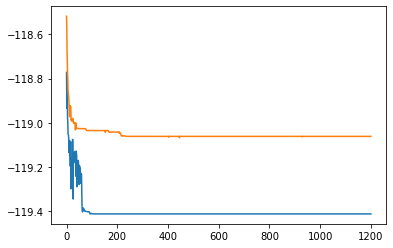

In [13]:
if __name__=="__main__":
    
    f6_shift_values = []
    
    with open('F6_shift_values.txt','r') as f:
        for line in f:
            f6_shift_values.append(float(line[:-1]))
              
    # Parameters for F6

    given_bias = -140
    given_dimensions = (50,500)
    given_bounds = (-32,32)
              
    best_fit = []
              
    print("Dimension 50 - PSO_Ackleys\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[0])
              
    print("Dimension 500 - PSO_Ackleys\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[1])